In [1]:
from ctlearn.image_mapping import ImageMapper

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the image mappers
hex_cams = ['LSTCam', 'FlashCam', 'NectarCam', 'DigiCam', 'VERITAS',
            'MAGICCam', 'FACT', 'HESS-I', 'HESS-II']
square_cams = ['SCTCam', 'CHEC', 'ASTRICam']
camera_types = hex_cams + square_cams
hex_algos = ['oversampling', 'rebinning', 'nearest_interpolation',
             'bilinear_interpolation', 'bicubic_interpolation', 
             'image_shifting', 'axial_addressing']
square_algos = ['oversampling', 'rebinning', 'nearest_interpolation',
                'bilinear_interpolation', 'bicubic_interpolation']

mappers = {}
for hex_algo in hex_algos:
    print(hex_algo)
    hex_conversion_algorithm = {cam: hex_algo for cam in hex_cams}
    for cam in square_cams:
        hex_conversion_algorithm[cam] = hex_algo if hex_algo in square_algos else 'oversampling'
    %time mappers[hex_algo] = ImageMapper(hex_conversion_algorithm=hex_conversion_algorithm)

oversampling
CPU times: user 4.12 s, sys: 913 ms, total: 5.03 s
Wall time: 5.08 s
rebinning
CPU times: user 17.4 s, sys: 1.91 s, total: 19.3 s
Wall time: 19.3 s
nearest_interpolation
CPU times: user 4.3 s, sys: 1.36 s, total: 5.66 s
Wall time: 5.66 s
bilinear_interpolation
CPU times: user 8.62 s, sys: 1.75 s, total: 10.4 s
Wall time: 10.4 s
bicubic_interpolation
CPU times: user 31.4 s, sys: 1.73 s, total: 33.1 s
Wall time: 33 s
image_shifting
CPU times: user 2.17 s, sys: 500 ms, total: 2.67 s
Wall time: 2.67 s
axial_addressing
CPU times: user 2.36 s, sys: 565 ms, total: 2.92 s
Wall time: 2.92 s


In [3]:
# Generate test pixel values (value is the pixel number)
test_pixel_values = {}
for tel in camera_types:
    test_pixel_values[tel] = np.concatenate(([0.0], np.arange(0, mappers['oversampling'].num_pixels[tel], 1)))
    test_pixel_values[tel] = np.expand_dims(test_pixel_values[tel], axis=1)

In [4]:
# Test loading time for individual telescopes
for cam in camera_types:
    print(cam)
    %time ImageMapper(camera_types=[cam])

LSTCam
CPU times: user 498 ms, sys: 120 ms, total: 618 ms
Wall time: 617 ms
FlashCam
CPU times: user 240 ms, sys: 83.6 ms, total: 324 ms
Wall time: 322 ms
NectarCam
CPU times: user 455 ms, sys: 160 ms, total: 615 ms
Wall time: 614 ms
DigiCam
CPU times: user 140 ms, sys: 20 ms, total: 160 ms
Wall time: 159 ms
VERITAS
CPU times: user 34.2 ms, sys: 0 ns, total: 34.2 ms
Wall time: 33 ms
MAGICCam
CPU times: user 178 ms, sys: 27.6 ms, total: 206 ms
Wall time: 205 ms
FACT
CPU times: user 149 ms, sys: 4.12 ms, total: 153 ms
Wall time: 152 ms
HESS-I
CPU times: user 75.1 ms, sys: 0 ns, total: 75.1 ms
Wall time: 73.5 ms
HESS-II
CPU times: user 245 ms, sys: 72.1 ms, total: 317 ms
Wall time: 315 ms
SCTCam
CPU times: user 1.47 s, sys: 549 ms, total: 2.02 s
Wall time: 2.02 s
CHEC
CPU times: user 85.7 ms, sys: 211 µs, total: 85.9 ms
Wall time: 84.4 ms
ASTRICam
CPU times: user 92.5 ms, sys: 15.6 ms, total: 108 ms
Wall time: 108 ms


In [5]:
def plot_image(mapper, camera_type):
    print(camera_type)
    image = mapper.map_image(test_pixel_values[camera_type], camera_type)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()

Default
LSTCam


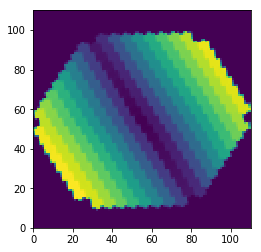

Padding
LSTCam


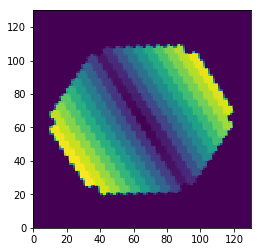

Default
FlashCam


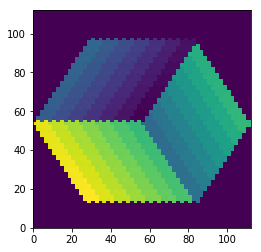

Padding
FlashCam


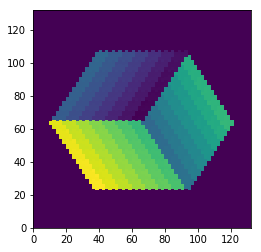

Default
NectarCam


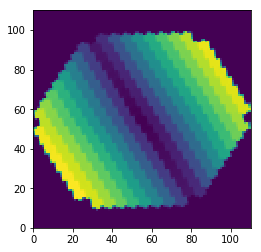

Padding
NectarCam


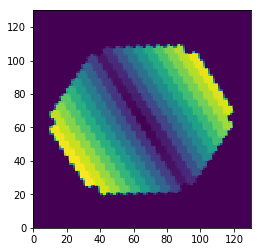

Default
DigiCam


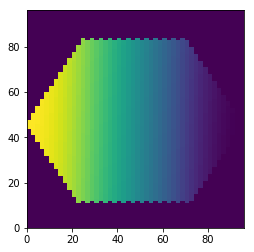

Padding
DigiCam


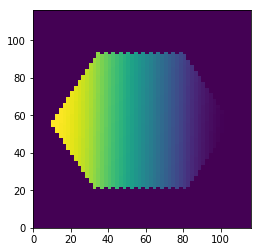

Default
VERITAS


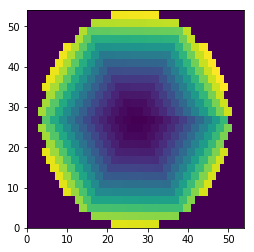

Padding
VERITAS


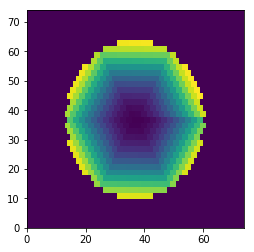

Default
MAGICCam


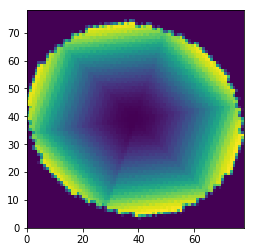

Padding
MAGICCam


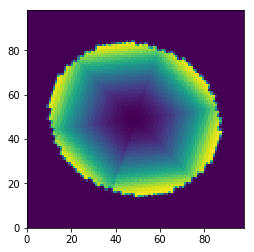

Default
FACT


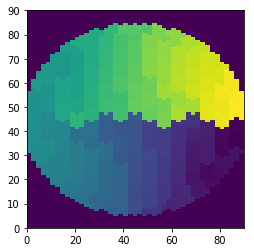

Padding
FACT


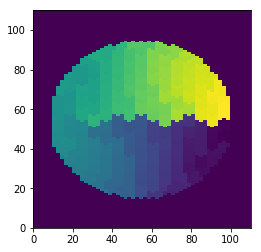

Default
HESS-I


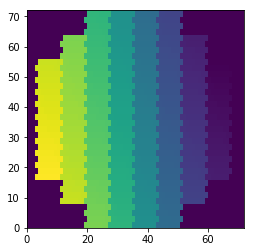

Padding
HESS-I


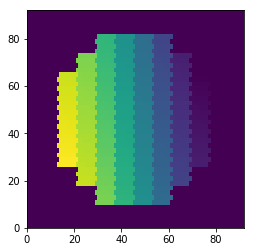

Default
HESS-II


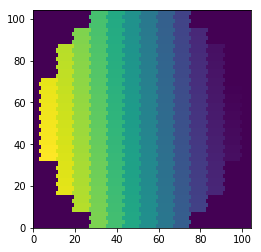

Padding
HESS-II


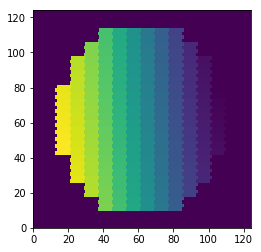

Default
SCTCam


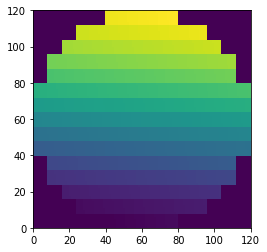

Padding
SCTCam


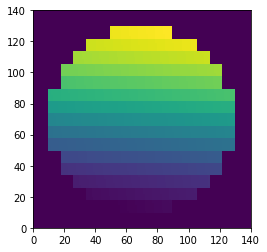

Default
CHEC


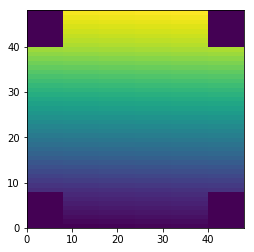

Padding
CHEC


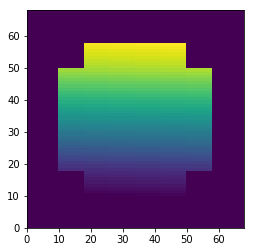

Default
ASTRICam


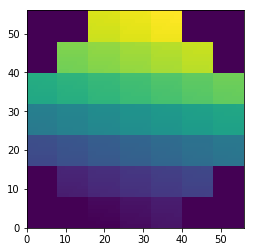

Padding
ASTRICam


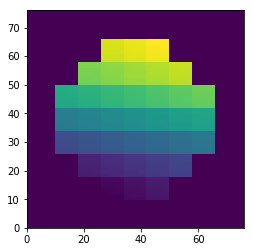

In [6]:
# Plot mapped images with and without padding
default_mapper = ImageMapper()
padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types})
for cam in camera_types:
    print('Default')
    plot_image(default_mapper, cam)
    print('Padding')
    plot_image(padding_mapper, cam)

oversampling
LSTCam


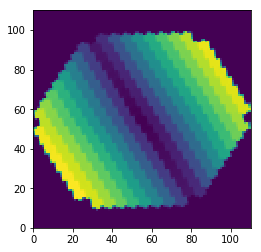

CPU times: user 582 ms, sys: 29.2 ms, total: 611 ms
Wall time: 583 ms

rebinning
LSTCam


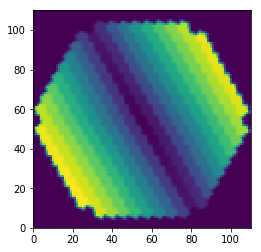

CPU times: user 497 ms, sys: 18.9 ms, total: 516 ms
Wall time: 489 ms

nearest_interpolation
LSTCam


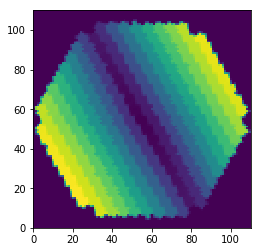

CPU times: user 492 ms, sys: 16.4 ms, total: 508 ms
Wall time: 485 ms

bilinear_interpolation
LSTCam


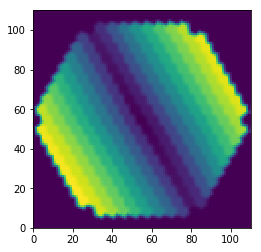

CPU times: user 597 ms, sys: 32.5 ms, total: 630 ms
Wall time: 586 ms

bicubic_interpolation
LSTCam


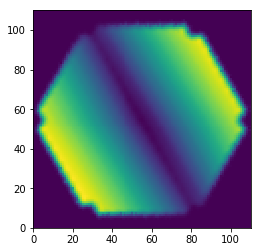

CPU times: user 477 ms, sys: 21.1 ms, total: 498 ms
Wall time: 475 ms

image_shifting
LSTCam


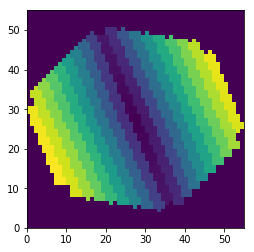

CPU times: user 185 ms, sys: 8.13 ms, total: 194 ms
Wall time: 193 ms

axial_addressing
LSTCam


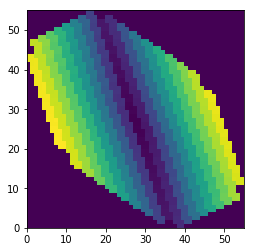

CPU times: user 187 ms, sys: 3.8 ms, total: 191 ms
Wall time: 189 ms



In [7]:
# Plot mapped images for each hexagonal conversion algorithm
for hex_algo in hex_algos:
    print(hex_algo)
    %time plot_image(mappers[hex_algo], 'LSTCam')
    print('')

LSTCam


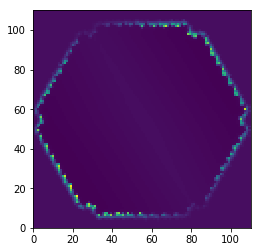

FlashCam


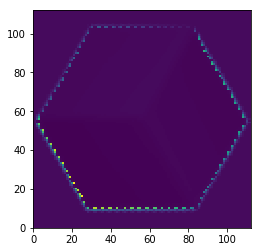

NectarCam


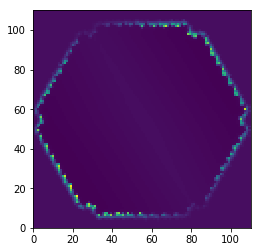

SCTCam


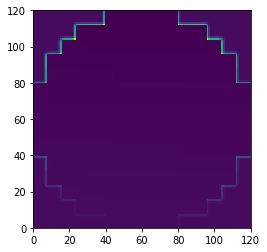

DigiCam


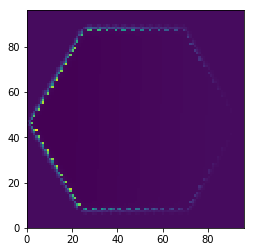

CHEC


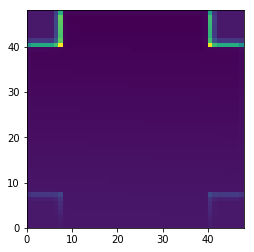

ASTRICam


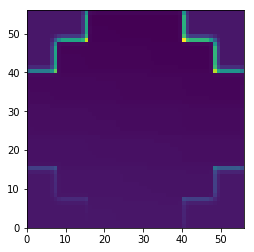

VERITAS


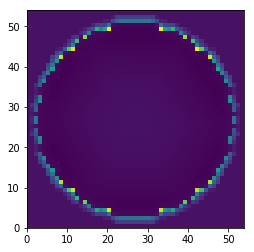

MAGICCam


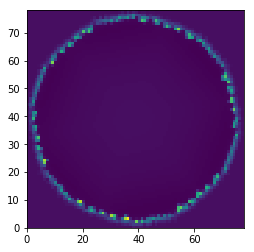

FACT


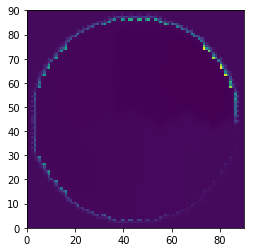

HESS-I


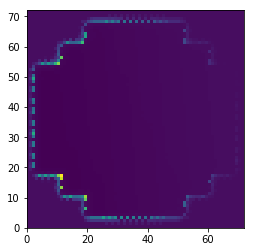

HESS-II


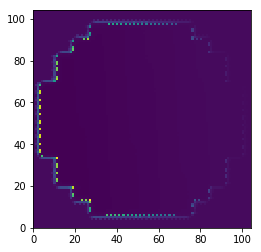

In [8]:
# Compare masked and non-masked interpolation
camera_types = ['LSTCam', 'FlashCam', 'NectarCam', 'SCTCam', 'DigiCam', 'CHEC',
                'ASTRICam', 'VERITAS', 'MAGICCam', 'FACT', 'HESS-I', 'HESS-II']
masked_mapper = ImageMapper(hex_conversion_algorithm={cam: 'bicubic_interpolation' for cam in camera_types}, mask_interpolation=True)
unmasked_mapper = ImageMapper(hex_conversion_algorithm={cam: 'bicubic_interpolation' for cam in camera_types}, mask_interpolation=False)
for cam in camera_types:
    print(cam)
    image = unmasked_mapper.map_image(test_pixel_values[cam], cam) - masked_mapper.map_image(test_pixel_values[cam], cam)
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()